All data sourced from the European Alternative Fuels (AF) Observatory:

[country_identifier]_psg_vehicle_fleetdata:
AF Fleet percentage of total fleet (M1)
Fleet of alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total fleet.

[country_identifier]_psg_vehicle_fleetdata:
AF New registrations (M1)
Number of newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars (M1).

[country_identifier]_psg_vehicle_fleetdata:
AF Market share of total registrations (M1)
Newly registered alternative fuelled (BEV, PHEV, H2, LPG, CNG, LNG) passenger cars as a percentage of the total number of registrations.

In [31]:
import pandas as pd
import os

# Debug: Check the current working directory
print("Current Working Directory:", os.getcwd())

# Set the path to the raw data folder
data_path = "../data/raw/fleet_data"  # Relative path to the raw data folder

# Verify if the path exists
if not os.path.exists(data_path):
    print(f"Relative path '{data_path}' not found. Using absolute path instead.")
    data_path = "c:/Users/jskif/OneDrive - epfl.ch/Documents/SMT/DSML/DSML/data/raw"

# List all CSV files in the raw data folder
csv_files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

# Initialize dictionaries to store DataFrames for each file type
newreg_dataframes = {}
eu_dataframes = {}
registrations_dataframes = {}

# Process files based on their type
for file in csv_files:
    country_name = file.split("_")[0]  # Extract country name from the file name
    file_path = os.path.join(data_path, file)

    if file.endswith("newreg.csv"):
        newreg_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("EU.csv"):
        eu_dataframes[country_name] = pd.read_csv(file_path)
    elif file.endswith("registrations.csv"):
        registrations_dataframes[country_name] = pd.read_csv(file_path)

# Combine datasets for each file type
combined_newreg_df = pd.concat(newreg_dataframes.values(), keys=newreg_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_fleet_df = pd.concat(eu_dataframes.values(), keys=eu_dataframes.keys(), names=["Country", "Index"]).reset_index()
combined_registrations_mktshare_df = pd.concat(registrations_dataframes.values(), keys=registrations_dataframes.keys(), names=["Country", "Index"]).reset_index()

# Display basic information about the combined datasets
print("Combined New Registrations Dataset Info:")
print(combined_newreg_df.info())

print("\nCombined EU Dataset Info:")
print(combined_fleet_df.info())

print("\nCombined Registrations Dataset Info:")
print(combined_registrations_mktshare_df.info())

# Save the combined datasets to the processed folder
processed_path = "../data/processed"
os.makedirs(processed_path, exist_ok=True)

combined_newreg_df.to_csv(os.path.join(processed_path, "combined_newreg_data.csv"), index=False)
combined_fleet_df.to_csv(os.path.join(processed_path, "combined_fleet_data.csv"), index=False)
combined_registrations_mktshare_df.to_csv(os.path.join(processed_path, "combined_registrations_mktshare_data.csv"), index=False)

print(f"Combined datasets saved to {processed_path}/")  

Current Working Directory: c:\Users\jskif\OneDrive - epfl.ch\Documents\SMT\DSML\DSML\notebooks
Combined New Registrations Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   108 non-null    object 
 1   Index     108 non-null    int64  
 2   Category  108 non-null    int64  
 3   BEV       108 non-null    int64  
 4   PHEV      108 non-null    int64  
 5   H2        73 non-null     float64
 6   LPG       39 non-null     float64
 7   CNG       85 non-null     float64
 8   LNG       0 non-null      float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.7+ KB
None

Combined EU Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   96 non-null     object 
 1   Index     96 

In [32]:
# Load the processed datasets
processed_path = "../data/processed"
newreg_df = pd.read_csv(os.path.join(processed_path, "combined_newreg_data.csv"))
fleet_df = pd.read_csv(os.path.join(processed_path, "combined_fleet_data.csv"))
registrations_mktshare_df = pd.read_csv(os.path.join(processed_path, "combined_registrations_mktshare_data.csv"))

# EDA: Summary statistics
print("New Registrations Dataset Summary:")
print(newreg_df.describe())

print("\nEU Dataset Summary:")
print(fleet_df.describe())

print("\nRegistrations Dataset Summary:")
print(registrations_mktshare_df.describe())

# Check for missing values
print("\nMissing Values in New Registrations Dataset:")
print(newreg_df.isnull().sum())

print("\nMissing Values in EU Dataset:")
print(fleet_df.isnull().sum())

print("\nMissing Values in Registrations Dataset:")
print(registrations_mktshare_df.isnull().sum())

New Registrations Dataset Summary:
            Index     Category            BEV          PHEV          H2  \
count  108.000000   108.000000     108.000000    108.000000   73.000000   
mean     8.500000  2016.500000   23179.083333  11451.685185   21.136986   
std      5.212315     5.212315   34402.219175  16991.123554   32.048277   
min      0.000000  2008.000000       0.000000      0.000000    0.000000   
25%      4.000000  2012.000000     597.500000     69.500000    2.000000   
50%      8.500000  2016.500000    5151.000000   3217.500000   11.000000   
75%     13.000000  2021.000000   31966.000000  17280.250000   25.000000   
max     17.000000  2025.000000  138287.000000  77842.000000  156.000000   

               LPG          CNG  LNG  
count    39.000000    85.000000  0.0  
mean   1076.948718  1140.905882  NaN  
std    2070.714979  1645.046639  NaN  
min       0.000000     0.000000  NaN  
25%       0.000000    55.000000  NaN  
50%       4.000000   600.000000  NaN  
75%    1246.0000

In [33]:
print("\nMissing Values in New Registrations Dataset:")
print(newreg_df.isnull().sum())
print("\nMissing Values in EU Dataset:")
print(fleet_df.isnull().sum())
print("\nMissing Values in Registrations Dataset:")
print(registrations_mktshare_df.isnull().sum())


Missing Values in New Registrations Dataset:
Country       0
Index         0
Category      0
BEV           0
PHEV          0
H2           35
LPG          69
CNG          23
LNG         108
dtype: int64

Missing Values in EU Dataset:
Country      0
Index        0
Category     0
BEV         13
PHEV        23
H2          38
LPG         23
CNG         20
LNG         91
dtype: int64

Missing Values in Registrations Dataset:
Country       0
Index         0
Category      0
BEV           6
PHEV          6
H2           36
LPG          69
CNG          27
LNG         108
dtype: int64


In [34]:
print(newreg_df.columns)
print(fleet_df.columns)
print(registrations_mktshare_df.columns)

Index(['Country', 'Index', 'Category', 'BEV', 'PHEV', 'H2', 'LPG', 'CNG',
       'LNG'],
      dtype='object')
Index(['Country', 'Index', 'Category', 'BEV', 'PHEV', 'H2', 'LPG', 'CNG',
       'LNG'],
      dtype='object')
Index(['Country', 'Index', 'Category', 'BEV', 'PHEV', 'H2', 'LPG', 'CNG',
       'LNG'],
      dtype='object')


In [35]:
# Consolidate alternative fuel columns into a single column 'AF' for each dataframe
combined_fleet_df['AF'] = combined_fleet_df[['BEV', 'PHEV', 'H2', 'LPG', 'CNG', 'LNG']].sum(axis=1, skipna=True)
combined_newreg_df['AF'] = combined_newreg_df[['BEV', 'PHEV', 'H2', 'LPG', 'CNG', 'LNG']].sum(axis=1, skipna=True)
combined_registrations_mktshare_df['AF'] = combined_registrations_mktshare_df[['BEV', 'PHEV', 'H2', 'LPG', 'CNG', 'LNG']].sum(axis=1, skipna=True)

# Display the updated dataframes
print(combined_fleet_df[['Country', 'Category', 'AF']].head())
print(combined_newreg_df[['Country', 'Category', 'AF']].head())
print(combined_registrations_mktshare_df[['Country', 'Category', 'AF']].head())

  Country  Category    AF
0      AT      2008  0.00
1      AT      2009  0.01
2      AT      2010  0.01
3      AT      2011  0.08
4      AT      2012  0.10
  Country  Category      AF
0      AT      2008  1381.0
1      AT      2009   491.0
2      AT      2010   445.0
3      AT      2011  1077.0
4      AT      2012  1154.0
  Country  Category    AF
0      AT      2008  0.00
1      AT      2009  0.14
2      AT      2010  0.13
3      AT      2011  0.30
4      AT      2012  0.35


In [40]:
# Rename the 'Category' column to 'Year' in all relevant dataframes
combined_fleet_df.rename(columns={'Category': 'Year'}, inplace=True)
combined_newreg_df.rename(columns={'Category': 'Year'}, inplace=True)
combined_registrations_mktshare_df.rename(columns={'Category': 'Year'}, inplace=True)
fleet_df.rename(columns={'Category': 'Year'}, inplace=True)
newreg_df.rename(columns={'Category': 'Year'}, inplace=True)
registrations_mktshare_df.rename(columns={'Category': 'Year'}, inplace=True)

## EDA: figures

In [ ]:
def save_figure(fig, filename):
    """Save the figure to the figures folder if it doesn't already exist."""
    filepath = os.path.join(figures_path, filename)
    if not os.path.exists(filepath):
        fig.savefig(filepath)
        print(f"Figure saved: {filepath}")
    else:
        print(f"Figure already exists: {filepath}")

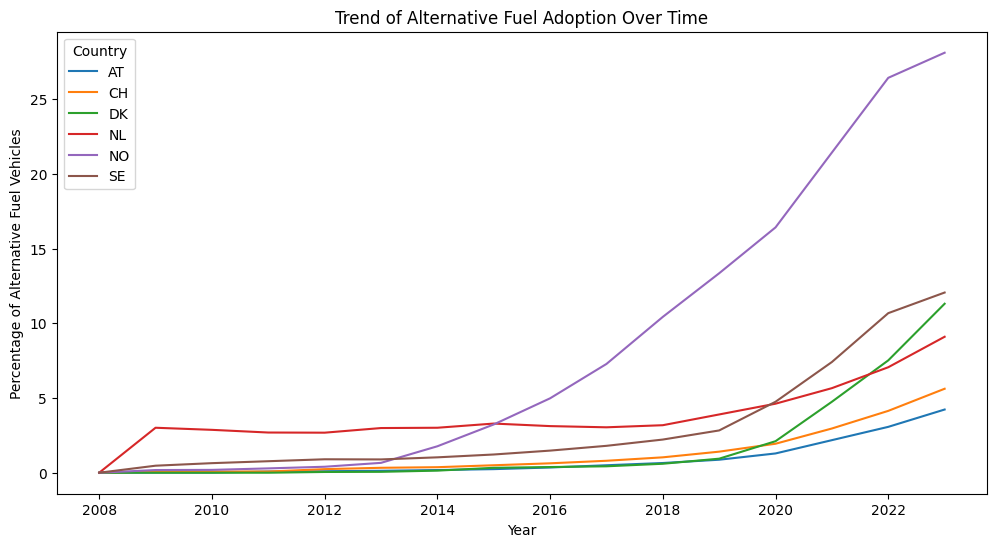

Figure saved: ../figures\af_adoption_over_time.png


<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_fleet_df, x="Year", y="AF", hue="Country")  # Replace with actual column names
plt.title("Trend of Alternative Fuel Adoption Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Alternative Fuel Vehicles")
plt.legend(title="Country")
plt.show()

# Save the figure
fig = plt.gcf()
save_figure(fig, "af_adoption_over_time.png")
plt.show()

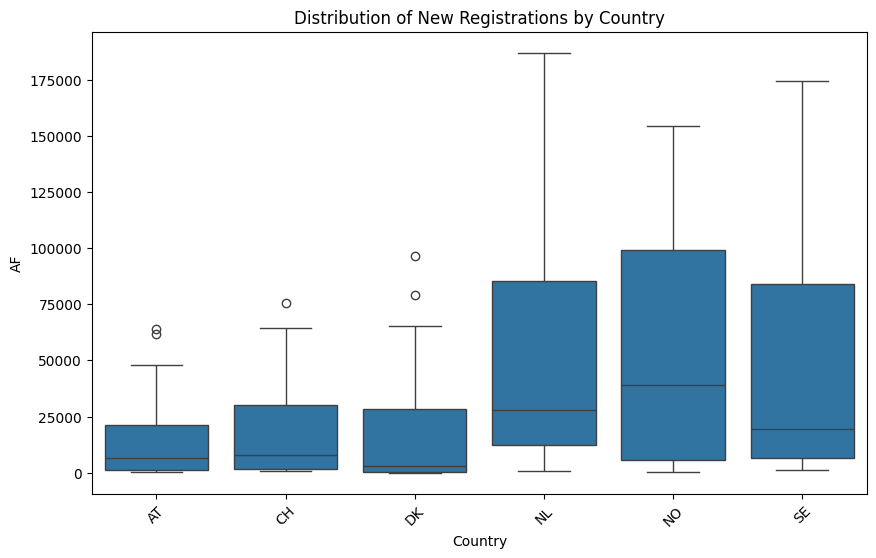

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_newreg_df, x="Country", y="AF")  # Replace with actual column name
plt.title("Distribution of New Registrations by Country")
plt.xticks(rotation=45)
plt.show()

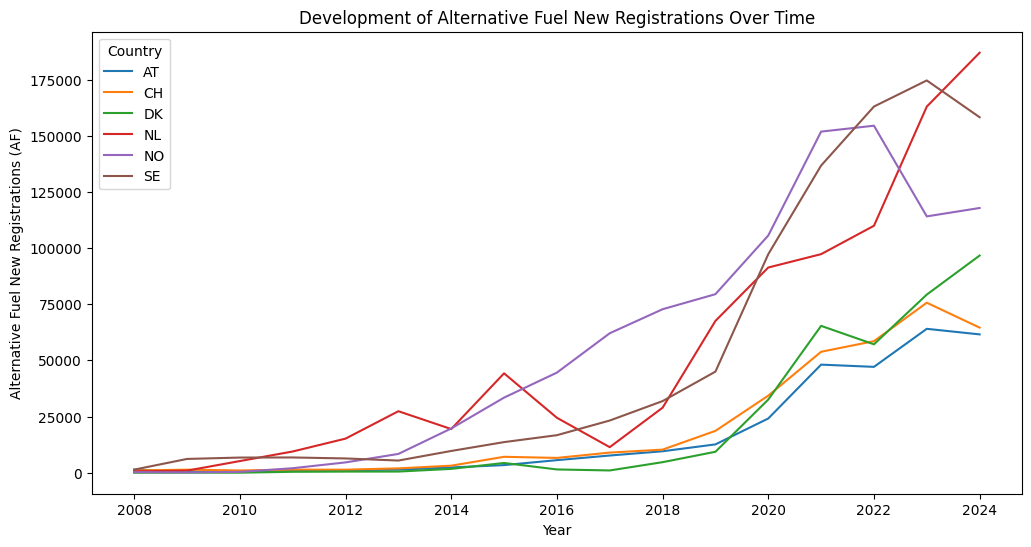

In [51]:
# Exclude year 2025 from combined_newreg_df
filtered_newreg_df = combined_newreg_df[combined_newreg_df["Year"] != 2025]

# Plot the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_newreg_df, x="Year", y="AF", hue="Country")
plt.title("Development of Alternative Fuel New Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Alternative Fuel New Registrations (AF)")
plt.legend(title="Country")

# Format x-axis to show every other year without commas
plt.xticks(ticks=filtered_newreg_df["Year"].unique()[::2], labels=filtered_newreg_df["Year"].unique()[::2], rotation=0)

plt.show()

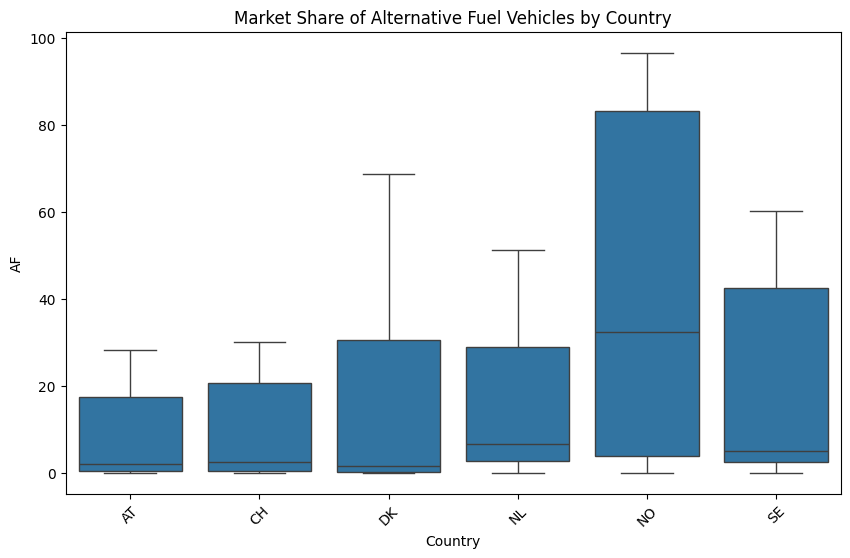

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_registrations_mktshare_df, x="Country", y="AF")  # Replace with actual column name
plt.title("Market Share of Alternative Fuel Vehicles by Country")
plt.xticks(rotation=45)
plt.show()

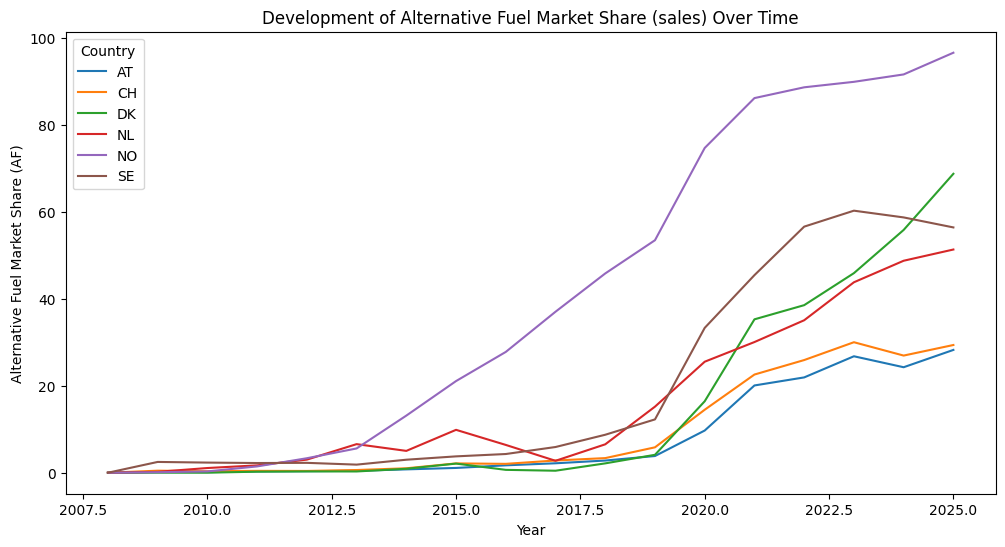

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_registrations_mktshare_df, x="Year", y="AF", hue="Country")
plt.title("Development of Alternative Fuel Market Share (sales) Over Time")
plt.xlabel("Year")
plt.ylabel("Alternative Fuel Market Share (AF)")
plt.legend(title="Country")
plt.show()